In [1]:
import gym
import numpy as np
import ECM_dVRL_v01
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from tabular import Tabular

In [2]:
env = gym.make('ECM-v0')

In [3]:
j1_values = np.round(np.arange(-0.9500, -0.6999, 0.0025), 4)
j2_values = np.round(np.arange(0., 0.15001, 0.0025), 4)
j3_values = np.round(np.arange(0., 0.10001, 0.0025), 4)
j4_values = np.round(np.arange(0., 0.10001, 0.0025), 4)

In [4]:
action_j1 = np.round(np.arange(-0.0025, 0.00251, 0.0025), 4)
action_j2 = np.round(np.arange(-0.0025, 0.00251, 0.0025), 4)
action_j3 = np.round(np.arange(-0.0025, 0.00251, 0.0025), 4)
action_j4 = np.round(np.arange(-0.0025, 0.00251, 0.0025), 4)

In [6]:
state_space = []
for j1 in j1_values:
    for j2 in j2_values:
        for j3 in j3_values:
            for j4 in j4_values:
                state_space.append([j1, j2, j3, j4])
                
action_space = []
for a1 in action_j1:
    for a2 in action_j2:
        for a3 in action_j3:
            for a4 in action_j4:
                action_space.append([a1, a2, a3, a4])

In [7]:
obj = Tabular(env, state_space, action_space)

In [8]:
obj.run(500, 100, False, 'observation', True, 4)

(10356641, 81)


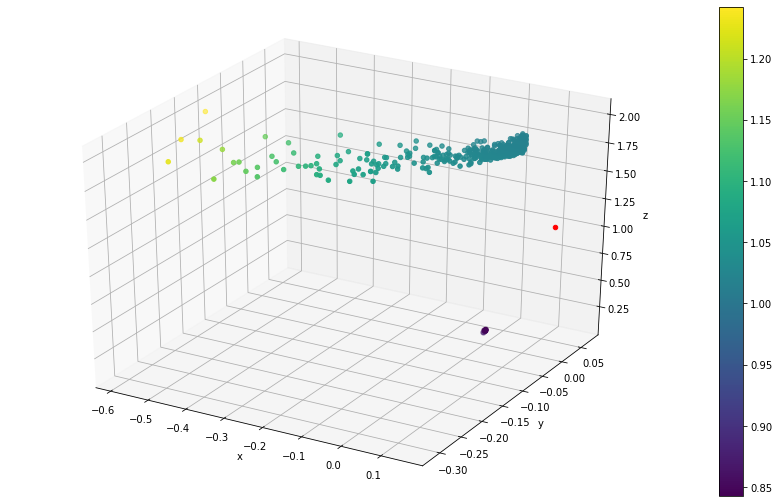

In [9]:
obj.visualize('goal locations')
plt.savefig('Goal locations for 500 episodes.jpg')

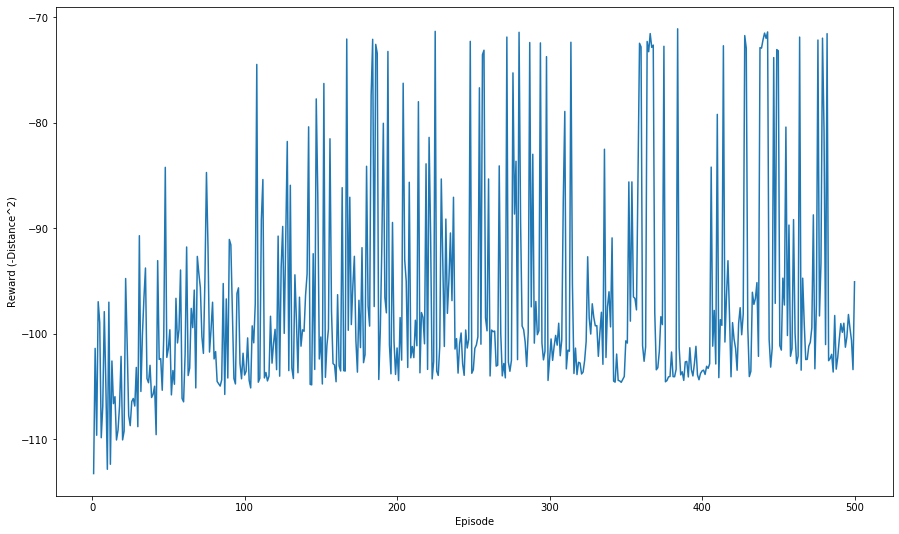

In [10]:
obj.visualize('reward')

In [17]:
obj.env.marker_pos

array([ 0.10570952,  0.0677048 , -0.01344275])

In [12]:
successful_policies = []
achieved_goals = obj.achieved_final_goals
desired_goal = obj.env.desired_goal
for goal, policy in zip(achieved_goals, obj.episode_policy):
    if np.linalg.norm(goal - desired_goal) < obj.env.success_radius:
        successful_policies.append(policy)

In [20]:
cwd = os.getcwd()
folder_path = cwd + '/ECM_reached_target_j1_at_0.92/'
folder_path

'/home/arclab-flo/Desktop/Bose/ECM_reached_target_j1_at_0.92/'

In [27]:
obj.env.reset()

{'observation': array([-0.92000002,  0.05      ,  0.        ,  0.        ]),
 'achieved_goal': array([0., 0.]),
 'desired_goal': array([270., 216.])}

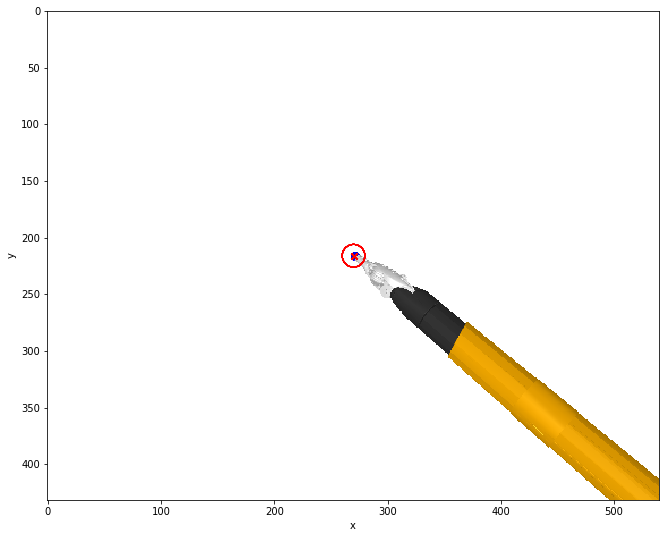

In [28]:
frame = 1
best_policy = successful_policies[0]
for action in best_policy:
    obj.env.step(action)
    li, ri = obj.env.ecm.getStereoImagePairs()
    plt.rcParams['figure.figsize'] = (15, 9)
    plt.scatter(desired_goal[0], desired_goal[1], color = 'red', marker = 'x', label = 'goal')
    circle = plt.Circle((desired_goal[0], desired_goal[1]), 10.0, fill = False, ec = 'red')
    plt.gca().add_patch(circle)
    plt.xlabel('x')
    plt.ylabel('y')
    image = plt.imshow(li, animated = True)
    plt.savefig(folder_path+ 'Frame{}.jpg'.format(frame))
    frame += 1
plt.show()

In [29]:
import pickle

In [30]:
with open(folder_path+'successful_policies_depth.pkl', 'wb') as f:
    pickle.dump(successful_policies, f)
f.close()

In [6]:
obj.close_sim()

NameError: name 'obj' is not defined